# Which are the best wines for the money?

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'savefig.dpi' : 100})
sns.set_context("paper")
sns.set_style("darkgrid")
wines = pd.read_csv('wines.csv', index_col=0)
scores = pd.read_csv('scores.csv', index_col=0)
nights = pd.read_csv('nights.csv')

In [61]:
# To do the price regression, we add the price
# of the wine to the scores dataframe
scores['Price'] = wines.iloc[scores.wine].Price.reset_index(drop=True)

# Similarly to the last post, we'll remove some of the more infrequent members
tastings = scores.groupby('Name').count().Score.copy()
best_tasters = tastings[tastings >= tastings['Zac']].index.values
scores = scores[scores.Name.isin(best_tasters)].copy()

In [62]:
def robust_z(x):
    dev = x - x.median()
    mad = np.abs(dev).median()
    return dev / mad   

scores['scaled_score'] = scores.groupby('order').Score.transform(lambda x: x - x.median())
scores['scaled_score'] = scores.groupby('Name').Score.transform(robust_z)
wines['scaled_score'] = scores.groupby('wine').scaled_score.median()

In [66]:
xdata = wines[wines.Price.notnull()].Price.values
ydata = wines[wines.Price.notnull()].scaled_score.values
sort_inds = xdata.argsort()
xdata = xdata[sort_inds]
ydata = ydata[sort_inds]

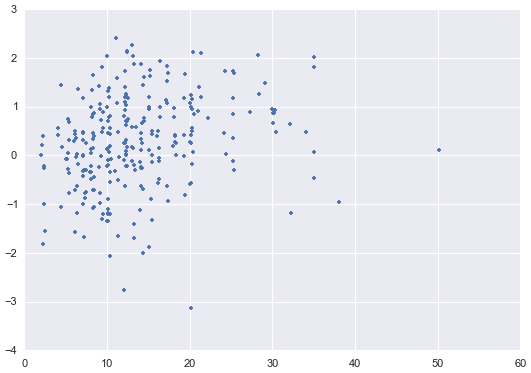

In [70]:
plt.plot(xdata + .5*np.random.rand(xdata.shape[0]),
         ydata + .5*np.random.rand(ydata.shape[0]), '.')

In [73]:
wines.iloc[wines.scaled_score.argmax()]

order                     6
Wine Name         Las Rocas
Region                Spain
Year                   2008
Price                    11
Purchaser       NateK/Peter
season                    2
night                     4
scaled_score              2
Name: 118, dtype: object